In [1]:
# Importing Important Libraries

import re    # for regular expressions 
import nltk  # for text manipulation 
from nltk.corpus import stopwords
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.set_option("display.max_colwidth", 500) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
# read data
df = pd.read_csv("train_2kmZucJ.csv")

# Data Inspection

In [4]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [5]:
df['label'].value_counts()
# 0 positive
# 1 Negative

0    5894
1    2026
Name: label, dtype: int64

In [6]:
df.shape

(7920, 3)

In [7]:
df[df['label'] == 1].head()

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
10,11,1,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.
11,12,1,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade
12,13,1,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo


In [8]:
df[df['label'] == 0].head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/


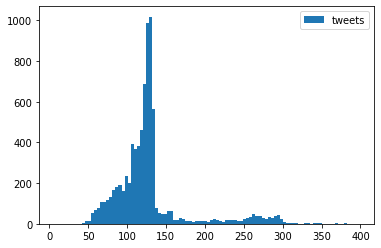

In [9]:
#we will check the distribution of length of the tweets, 
#in terms of words, in both train and test data
length = df['tweet'].str.len()  
plt.hist(length, bins=100, label="tweets")  
plt.legend() 
plt.show()

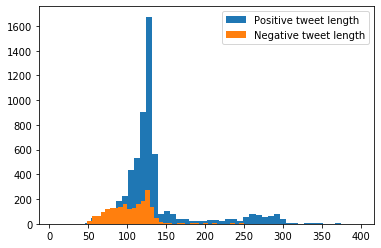

In [10]:
plt.hist(df[df['label'] == 0]['tweet'].str.len(),bins = 50, label="Positive tweet length")
plt.hist(df[df['label'] == 1]['tweet'].str.len(),bins = 50, label="Negative tweet length")

plt.legend() 
plt.show()

# Data Cleaning


In [11]:
# Definong a function to remove unwanted text from tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt) 
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 
# findall returns a list of all non-overlapping matches in the string.
# re.sub = Return the string obtained by replacing the leftmost
# non-overlapping occurrences of the pattern in string by the
# replacement repl.

In [12]:
#1 Removing the @user identifiers
df['mod_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") 
df.head()

,id,label,tweet,mod_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [13]:

string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
puncs = '"!!$%&\'(:)*+,-;<=>?^^`{|}~'

In [15]:
# 2. Removing Punctuations, Numbers, and Special Characters

# Here we will replace everything except characters and hashtags with spaces. 
# The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

df['mod_tweet'] = df['mod_tweet'].str.replace("[^a-zA-Z#]", " ") 

df['mod_tweet']=df['mod_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in puncs]))
df.head()

,id,label,tweet,mod_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias http instagram com p YGEt JC JM
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http fb me N LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I m wired I know I m George I was made that way #iphone #cute #daventry #home http instagr am p Li ujS k
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple won t even talk to me about a question I have unless I pay them for their stupid support


In [16]:
stp_wrds = stopwords.words('english')
stp_wrds = stp_wrds +["'I'm",'us','go?']

In [17]:
#3. Removing Stop Words
 
df['mod_tweet']=df['mod_tweet'].apply(lambda x: ' '.join([w for w in x.split() 
                                                          if w.lower() not in stp_wrds]))
df['mod_tweet']=df['mod_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

#Let’s take another look at the first few rows of the combined dataframe.

df.head()

,id,label,tweet,mod_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally transparant silicon case Thanks uncle #yay #Sony #Xperia #sonyexperias http instagram com YGEt
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love Would #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know George made way #iphone #cute #daventry #home http instagr ujS
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,amazing service Apple even talk question unless pay stupid support


In [18]:
#4. Tokenization and Text Normalization

# Here we will use nltk’s PorterStemmer() function to normalize the tweets. 
# But before that we will have to tokenize the tweets. 
# tokenization is the process of splitting a string of text into tokens/words.

tokenized_tweet = df['mod_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, goo, MfQV, #android, #apps, #beautiful, #cute, #health, #igers, #iphoneonly, #iphonesia, #iphone]
1                        [Finally, transparant, silicon, case, Thanks, uncle, #yay, #Sony, #Xperia, #sonyexperias, http, instagram, com, YGEt]
2                                    [love, Would, #talk, #makememories, #unplug, #relax, #iphone, #smartphone, #wifi, #connect, http, LsUpCu]
3                                                       [wired, know, George, made, way, #iphone, #cute, #daventry, #home, http, instagr, ujS]
4                                                                [amazing, service, Apple, even, talk, question, unless, pay, stupid, support]
Name: mod_tweet, dtype: object

In [19]:
# Now we can normalize the tokenized tweets.
# Stemming

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, goo, mfqv, #android, #app, #beauti, #cute, #health, #iger, #iphoneonli, #iphonesia, #iphon]
1                        [final, transpar, silicon, case, thank, uncl, #yay, #soni, #xperia, #sonyexperia, http, instagram, com, yget]
2                                [love, would, #talk, #makememori, #unplug, #relax, #iphon, #smartphon, #wifi, #connect, http, lsupcu]
3                                                   [wire, know, georg, made, way, #iphon, #cute, #daventri, #home, http, instagr, uj]
4                                                             [amaz, servic, appl, even, talk, question, unless, pay, stupid, support]
Name: mod_tweet, dtype: object

In [20]:
# Now let’s stitch these tokens back together. 
# It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
df['mod_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,mod_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #pregnanc test http goo mfqv #android #app #beauti #cute #health #iger #iphoneonli #iphonesia #iphon
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,final transpar silicon case thank uncl #yay #soni #xperia #sonyexperia http instagram com yget
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love would #talk #makememori #unplug #relax #iphon #smartphon #wifi #connect http lsupcu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wire know georg made way #iphon #cute #daventri #home http instagr uj
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,amaz servic appl even talk question unless pay stupid support


# Story Generation and Data Visualization
 Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. 
 Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

    * What are the most common words in the entire dataset?
    * What are the most common words in the dataset for negative and positive tweets, respectively?
    * How many hashtags are there in a tweet?
    * Which trends are associated with my dataset?
    * Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

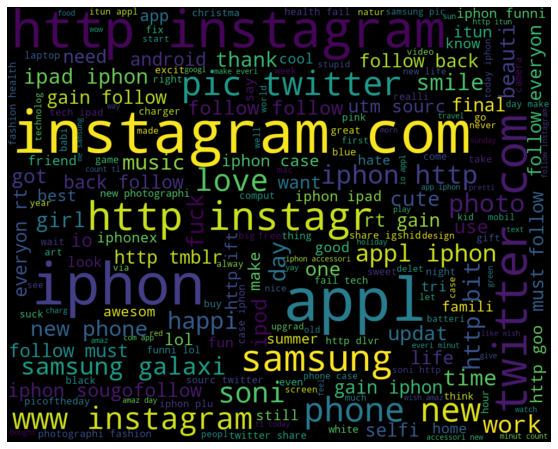

In [21]:
# Creating wordcloud for all the dataset
all_words = ' '.join([text for text in df['mod_tweet']]) 

from wordcloud import WordCloud 

wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

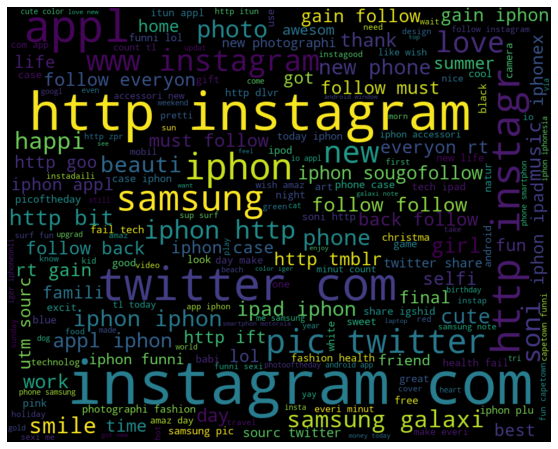

In [22]:
# Wordcloud with positive sentiments

pos_words = ' '.join([text for text in df[df['label']==0]['mod_tweet']]) 

from wordcloud import WordCloud 

wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(pos_words)

plt.figure(figsize=(10, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

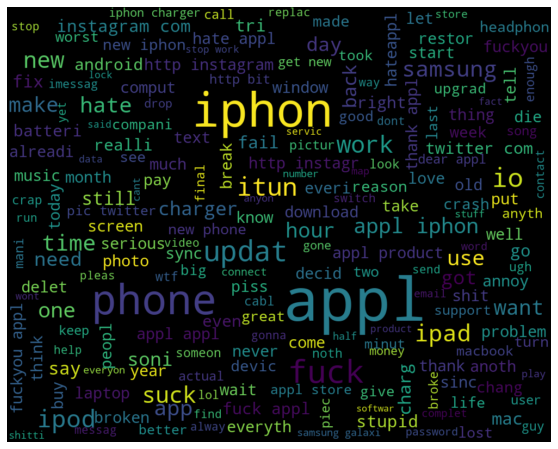

In [23]:
# Wordcloud with positive sentiments

neg_words = ' '.join([text for text in df[df['label']==1]['mod_tweet']]) 

from wordcloud import WordCloud 

wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(neg_words)

plt.figure(figsize=(10, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [24]:
# function to collect hashtags 
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [25]:
# extracting hashtags from positive tweets 
HT_pos = hashtag_extract(df['mod_tweet'][df['label'] == 0]) 
HT_pos

[['fingerprint',
  'pregnanc',
  'android',
  'app',
  'beauti',
  'cute',
  'health',
  'iger',
  'iphoneonli',
  'iphonesia',
  'iphon'],
 ['yay', 'soni', 'xperia', 'sonyexperia'],
 ['talk',
  'makememori',
  'unplug',
  'relax',
  'iphon',
  'smartphon',
  'wifi',
  'connect'],
 ['iphon', 'cute', 'daventri', 'home'],
 ['instap', 'instadaili', 'u', 'soni', 'xperia', 'xperiaz'],
 ['uk',
  'bay',
  'amazon',
  'etsi',
  'rob',
  'tobi',
  'evemun',
  'mcmafia',
  'taylor',
  'spectr',
  'newyear',
  'start',
  'recip',
  'technolog',
  'samsunggalaxi',
  'iphonex'],
 ['iphon', 'justm', 'music', 'likeforlik', 'followforfollow'],
 ['fun',
  'selfi',
  'pool',
  'water',
  'soni',
  'camera',
  'picoftheday',
  'sun',
  'instagood',
  'boy',
  'cute',
  'outdoor'],
 ['ipad', 'appl', 'shop'],
 ['deepellum',
  'downtown',
  'dalla',
  'bigd',
  'saturday',
  'rx',
  'soni',
  'summer',
  'urban'],
 ['iphon'],
 ['iphonesia', 'iphon', 'instagood', 'instagram', 'photooftheday', 'tweegram'],
 [

In [26]:
# extracting hashtags from negative tweets 
HT_neg = hashtag_extract(df['mod_tweet'][df['label'] == 1]) 
HT_neg

[[],
 [],
 ['appl'],
 ['drinkyourhaterad'],
 ['cellcom', 'depress', 'idontwantto'],
 ['hateorang'],
 ['iphon',
  'suck',
  'appl',
  'truth',
  'truthbetold',
  'agre',
  'fact',
  'realitycheck',
  'blackberryp'],
 ['fuckingpiss'],
 [],
 ['appl'],
 ['myloss', 'appl'],
 ['soangri', 'hateappl'],
 ['appl', 'itun'],
 [],
 ['iphon', 'appl'],
 [],
 [],
 [],
 [],
 ['sorri'],
 ['appl'],
 ['tech'],
 ['win', 'getalif', 'appl', 'tecshit'],
 ['fuckyou', 'appl', 'anotherangrycustom'],
 [],
 ['appl',
  'hater',
  'yousuck',
  'briantong',
  'easytotalk',
  'producesometh',
  'korean',
  'loser'],
 ['soni'],
 ['appl', 'io'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['yosemit', 'appl', 'updat'],
 ['fuckyou', 'soni', 'p'],
 ['sodepress', 'samsunggalaxyftw', 'loljk'],
 ['appl', 'usefuckingtorr'],
 ['appl', 'iphon'],
 ['samsung'],
 ['appl'],
 [],
 ['getbetterbatteri'],
 ['geniusbar', 'appl', 'customercar', 'batteri'],
 ['shitbird', 'colbertreport', 'appl', 'iwatch'],
 ['appl', 'iphon'],
 [],
 ['iphon', 'appl'],
 

In [27]:
#Unnest the lists
HT_pos = sum(HT_pos,[]) 
HT_pos

['fingerprint',
 'pregnanc',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'yay',
 'soni',
 'xperia',
 'sonyexperia',
 'talk',
 'makememori',
 'unplug',
 'relax',
 'iphon',
 'smartphon',
 'wifi',
 'connect',
 'iphon',
 'cute',
 'daventri',
 'home',
 'instap',
 'instadaili',
 'u',
 'soni',
 'xperia',
 'xperiaz',
 'uk',
 'bay',
 'amazon',
 'etsi',
 'rob',
 'tobi',
 'evemun',
 'mcmafia',
 'taylor',
 'spectr',
 'newyear',
 'start',
 'recip',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'iphon',
 'justm',
 'music',
 'likeforlik',
 'followforfollow',
 'fun',
 'selfi',
 'pool',
 'water',
 'soni',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'cute',
 'outdoor',
 'ipad',
 'appl',
 'shop',
 'deepellum',
 'downtown',
 'dalla',
 'bigd',
 'saturday',
 'rx',
 'soni',
 'summer',
 'urban',
 'iphon',
 'iphonesia',
 'iphon',
 'instagood',
 'instagram',
 'photooftheday',
 'tweegram',
 'appl',
 'art',
 'easter',
 'dear',
 'friend',
 'wife'

In [28]:
#Unnest the lists
HT_neg = sum(HT_neg,[]) 
HT_neg

['appl',
 'drinkyourhaterad',
 'cellcom',
 'depress',
 'idontwantto',
 'hateorang',
 'iphon',
 'suck',
 'appl',
 'truth',
 'truthbetold',
 'agre',
 'fact',
 'realitycheck',
 'blackberryp',
 'fuckingpiss',
 'appl',
 'myloss',
 'appl',
 'soangri',
 'hateappl',
 'appl',
 'itun',
 'iphon',
 'appl',
 'sorri',
 'appl',
 'tech',
 'win',
 'getalif',
 'appl',
 'tecshit',
 'fuckyou',
 'appl',
 'anotherangrycustom',
 'appl',
 'hater',
 'yousuck',
 'briantong',
 'easytotalk',
 'producesometh',
 'korean',
 'loser',
 'soni',
 'appl',
 'io',
 'yosemit',
 'appl',
 'updat',
 'fuckyou',
 'soni',
 'p',
 'sodepress',
 'samsunggalaxyftw',
 'loljk',
 'appl',
 'usefuckingtorr',
 'appl',
 'iphon',
 'samsung',
 'appl',
 'getbetterbatteri',
 'geniusbar',
 'appl',
 'customercar',
 'batteri',
 'shitbird',
 'colbertreport',
 'appl',
 'iwatch',
 'appl',
 'iphon',
 'iphon',
 'appl',
 'appl',
 'suck',
 'updat',
 'o',
 'disabl',
 'app',
 'custom',
 'android',
 'disappoint',
 'dissatisfi',
 'appl',
 'iphon',
 'incasear

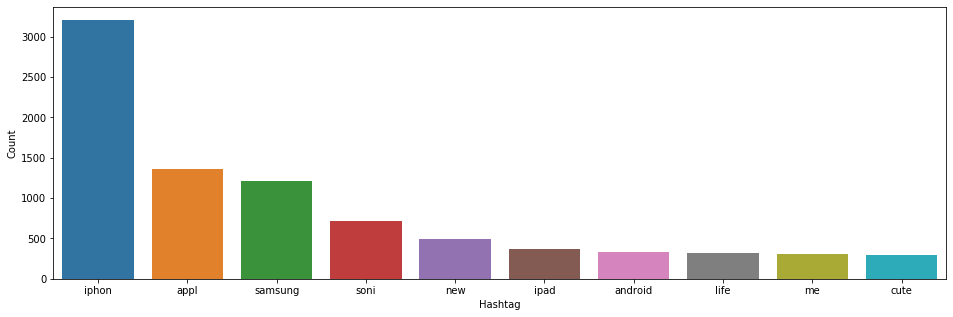

In [29]:
# Positive Tweets
a = nltk.FreqDist(HT_pos) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", orient= "V") 

# All these hashtags are positive and it makes sense. 

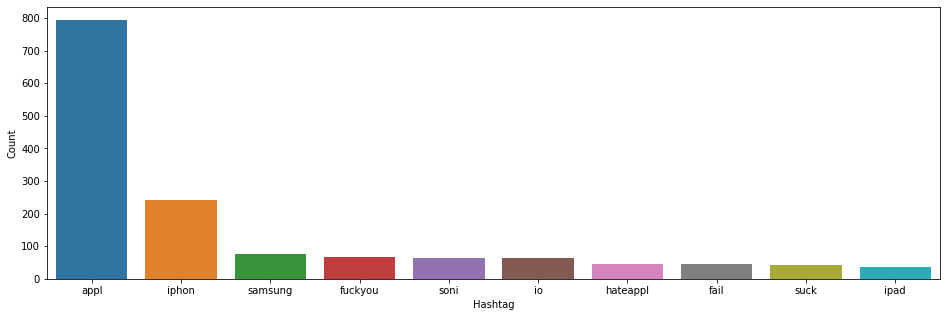

In [30]:
# Negative Tweets
a = nltk.FreqDist(HT_neg) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", orient= "V") 

# All these hashtags are positive and it makes sense. 

In [31]:
# Create BOW / TFIDF / Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
#Gensim is a Python library for topic modelling, document indexing 
#and similarity retrieval with large corpora.

In [71]:
#1. Bag of words:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, ngram_range=(1,3),
                                max_features=5000) 
bow = bow_vectorizer.fit_transform(df['mod_tweet']) 
bow.shape
# (7920, 5000)

(7920, 5000)

# Add Bi-gram and Tri-gram features:
import nltk

from nltk import bigrams

string = "I really like python, it's pretty awesome."

string_bigrams = bigrams(string)

print string_bigrams

Below 4 lines are just tests for n-grams
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 3
thrgrams = ngrams(sentence.split(), n)

for grams in thrgrams:
  print(grams)

from nltk.util import ngrams
text = "I am aware that nltk only offers bigrams and trigrams, but is there a way to split my text in four-grams, five-grams or even hundred-grams"
tokenize = nltk.word_tokenize(text)
tokenize

bigrams = ngrams(tokenize,2)
for i in bigrams:
  print(i)

trigrams = ngrams(tokenize,3)
for i in trigrams:
  print(i)

In [69]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,ngram_range=(1,3),
                                  max_features= 5000) 
tfidf = tfidf_vectorizer.fit_transform(df['mod_tweet']) 
tfidf.shape
# (7920, 2000)

(7920, 5000)

In [38]:
# Let’s train a Word2Vec model on our corpus.
tokenized_tweet = df['mod_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=500, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(df['mod_tweet']), epochs=20)

(1537799, 2214800)

In [40]:
len(model_w2v['appl'])

500

In [41]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [43]:
# Preparing word2vec feature set…

wordvec_arrays = np.zeros((len(tokenized_tweet), 500)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 500)

wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    
#(49159, 200)
# Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

(7920, 500)

# Modeling:

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

Logistic Regression

Support Vector Machine

RandomForest

XGBoost

In [57]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

#### Logistic Regression Model

In [73]:
#Bag-of-Words Features
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, df['label'],                                                            
                                                          random_state=42,
                                                          test_size=0.3)
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
prediction = lreg.predict_proba(xvalid_bow) 
# predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set
# without n-grams: 0.7963354474982381
# with n-grams: 0.8085409252669039
# with max-feature 5K : 0.80399

0.8039914468995011

In [70]:
#TF-IDF Features

# We’ll follow the same steps as above, but now for the TF-IDF feature set.

train_tfidf = tfidf
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 
# calculating f1 score for the validation set
# without n-grams: 0.8064516129032256
# with n-grams: 0.8122819260293092
# max_feature 5000 : 0.813725

0.8137254901960784

In [50]:
#Word2Vec Features

train_w2v = wordvec_df
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)
#0.8242677824267783


0.8242677824267783

#### Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. 

In [61]:
# Bag-of-Words Features

from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)
# without n-gramns: 0.7691197691197691
# with n-gramns: 0.7728268809349891

0.7728268809349891

In [62]:
#TF-IDF Features

svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)
# without n-grams : 0.7973856209150326
# with n-grams: 0.8107714701601164

0.8107714701601164

In [53]:
#Word2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)
#0.824946846208363

0.824946846208363

# RandomForest

Random Forest is a versatile machine learning algorithm capable of performing both regression and classification tasks. It is a kind of ensemble learning method, where a few weak models combine to form a powerful model.

In [63]:
# Bag-of-Words Features

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 400, random_state = 101)
rfc.fit(xtrain_bow, ytrain)
prediction = rfc.predict(xvalid_bow)

f1_score(yvalid, prediction)
# without n-gramsn 0.776305533904
# with n-grams: 0.783195798949737

0.7831957989497375

In [64]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 

f1_score(yvalid, prediction)
# without n-grams: 0.7832167832167832
# with n-grams: 0.7938

0.7938461538461539

In [56]:
# Word2Vec Features

rfc = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rfc.predict(xvalid_w2v) 
f1_score(yvalid, prediction)
#0.8126888217522659

0.8126888217522659

# XGBoost

Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. 

It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

In [65]:
#Bag-of-Words Features

from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

#without n-grams: 0.7691107644305772
# with n-grams: 0.7662

0.7662236121970291

In [66]:
# TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000)
xgb.fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)
#without n-grams: 0.7549563838223632
# with n-grams: 0.748437

0.7484375000000001

In [59]:
# Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgb.fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)
#0.813865862848530

0.8138658628485306

# FineTuning XGBoost + Word2Vec
XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them.

In [62]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 

# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [63]:
# We will prepare a custom evaluation metric to calculate F1 score.

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [64]:
# Tuning max_depth and min_child_weight

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )   
    
    # Finding best F1 Score
    
    mean_f1 = cv_results['test-f1_score-mean'].max()

    boost_rounds = cv_results['test-f1_score-mean'].argmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
            max_f1 = mean_f1
            best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))
    

CV with max_depth=6, min_child_weight=5
	F1 Score 0.8119522 for 11 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.8145896 for 16 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.8090742000000001 for 14 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.8107658000000001 for 12 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.810657 for 14 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.8102579999999999 for 22 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.8107814 for 7 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.8119553999999999 for 33 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.8064582 for 16 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.8095674 for 9 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.8091832 for 12 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.8107654 for 18 rounds
Best params: 6, 6, F1 Score: 0.8145896


In [65]:
#Updating max_depth and min_child_weight parameters.

params['max_depth'] = 6 
params['min_child_weight'] = 6

In [66]:
#Tuning subsample

gridsearch_params = [(subsample)
    for subsample in [i/10. for i in range(5,10)]]


max_f1 = 0. 
best_params = None 
for subsample in gridsearch_params:
    print("CV with subsample={}".format(subsample))
    # Update our parameters
    params['subsample'] = subsample
    
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )   
    
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample) 
        
        
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))    

CV with subsample=0.5
	F1 Score 0.803939 for 11 rounds
CV with subsample=0.6
	F1 Score 0.8109508 for 27 rounds
CV with subsample=0.7
	F1 Score 0.8075808 for 6 rounds
CV with subsample=0.8
	F1 Score 0.80511 for 12 rounds
CV with subsample=0.9
	F1 Score 0.8100120000000001 for 9 rounds
Best params: 0.6, F1 Score: 0.8109508


In [67]:
# Updating subsample 

params['subsample'] = .6

In [68]:
# Now let’s tune the learning rate.
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # Update ETA
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )
    
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.8109508 for 27 rounds
CV with eta=0.2
	F1 Score 0.8140946 for 43 rounds
CV with eta=0.1
	F1 Score 0.8124118000000001 for 38 rounds
CV with eta=0.05
	F1 Score 0.813016 for 54 rounds
CV with eta=0.01
	F1 Score 0.39957420000000005 for 0 rounds
CV with eta=0.005
	F1 Score 0.39957420000000005 for 0 rounds
Best params: 0.2, F1 Score: 0.8140946


In [69]:
params['eta'] = 0.2
params

{'objective': 'binary:logistic',
 'max_depth': 6,
 'min_child_weight': 6,
 'eta': 0.2,
 'subsample': 0.6,
 'colsample_bytree': 1}

In [70]:
xgb_model = xgb.train(
            params,
            dtrain,
            feval= custom_eval,
            num_boost_round= 1000,
            maximize=True,
            evals=[(dvalid, "Validation")],
            early_stopping_rounds=20
         )

[0]	Validation-error:0.13636	Validation-f1_score:0.42492
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 20 rounds.
[1]	Validation-error:0.12290	Validation-f1_score:0.42492
[2]	Validation-error:0.11700	Validation-f1_score:0.73070
[3]	Validation-error:0.11321	Validation-f1_score:0.77949
[4]	Validation-error:0.11658	Validation-f1_score:0.79344
[5]	Validation-error:0.11448	Validation-f1_score:0.80080
[6]	Validation-error:0.11280	Validation-f1_score:0.80054
[7]	Validation-error:0.11280	Validation-f1_score:0.80793
[8]	Validation-error:0.11321	Validation-f1_score:0.81456
[9]	Validation-error:0.11069	Validation-f1_score:0.80883
[10]	Validation-error:0.10943	Validation-f1_score:0.81302
[11]	Validation-error:0.11027	Validation-f1_score:0.81812
[12]	Validation-error:0.11195	Validation-f1_score:0.81307
[13]	Validation-error:0.10859	Validation-f1_score:0.81332
[14]	Validation-error:0.10816	Valid